In [1]:
# Import standard libraries
import os
import sys
import itertools

In [2]:
# Import libraries to manage arrays, plotting, and Flash-X datasets
import numpy
import matplotlib.pyplot as pyplot
import boxkit
from boxkit.library import Server as BoxServer

In [3]:
PROJECT_HOME="/home/akash/jobs/boiling-simulations/simulation/RisingBubble/OutflowTest"

In [4]:
sedona = BoxServer(hostname="c361652l.cels.anl.gov", username="akash")
sedona.connect()
datasetLoc = {
    r"Reference" : PROJECT_HOME + os.sep + "reference/jobnode.archive/2023-03-28",
    r"Buffer = 0.5" : PROJECT_HOME + os.sep + "outflow/buffer_0.5_growthRate_4.0/jobnode.archive/2023-03-28",
    r"Buffer = 1.0" : PROJECT_HOME + os.sep + "outflow/buffer_1.0_growthRate_4.0/jobnode.archive/2023-03-28",
    r"Buffer = 1.5" : PROJECT_HOME + os.sep + "outflow/buffer_1.5_growthRate_4.0/jobnode.archive/2023-03-28",
}

fileNumList = [1,3,5,7,8]

datasetList = []
for fileNum in fileNumList:
    datasetDict = {}
    for dsetKey in datasetLoc.keys():
        dataset = boxkit.read_dataset(datasetLoc[dsetKey] 
                                      + os.sep 
                                      + "INS_Rising_Bubble_hdf5_plt_cnt_"
                                      + str(fileNum).zfill(4), source="flash", server=sedona)
        datasetDict[dsetKey] = boxkit.mergeblocks(dataset, ["dfun","velx","vely"])
    datasetList.append(datasetDict)
sedona.close()

[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remot

/tmp/ipykernel_12526/2537343901.py:13: UserWarning: No contour levels were found within the data range.
  contour = subplot.contour(xmesh, ymesh, block["dfun"][0,:,:],


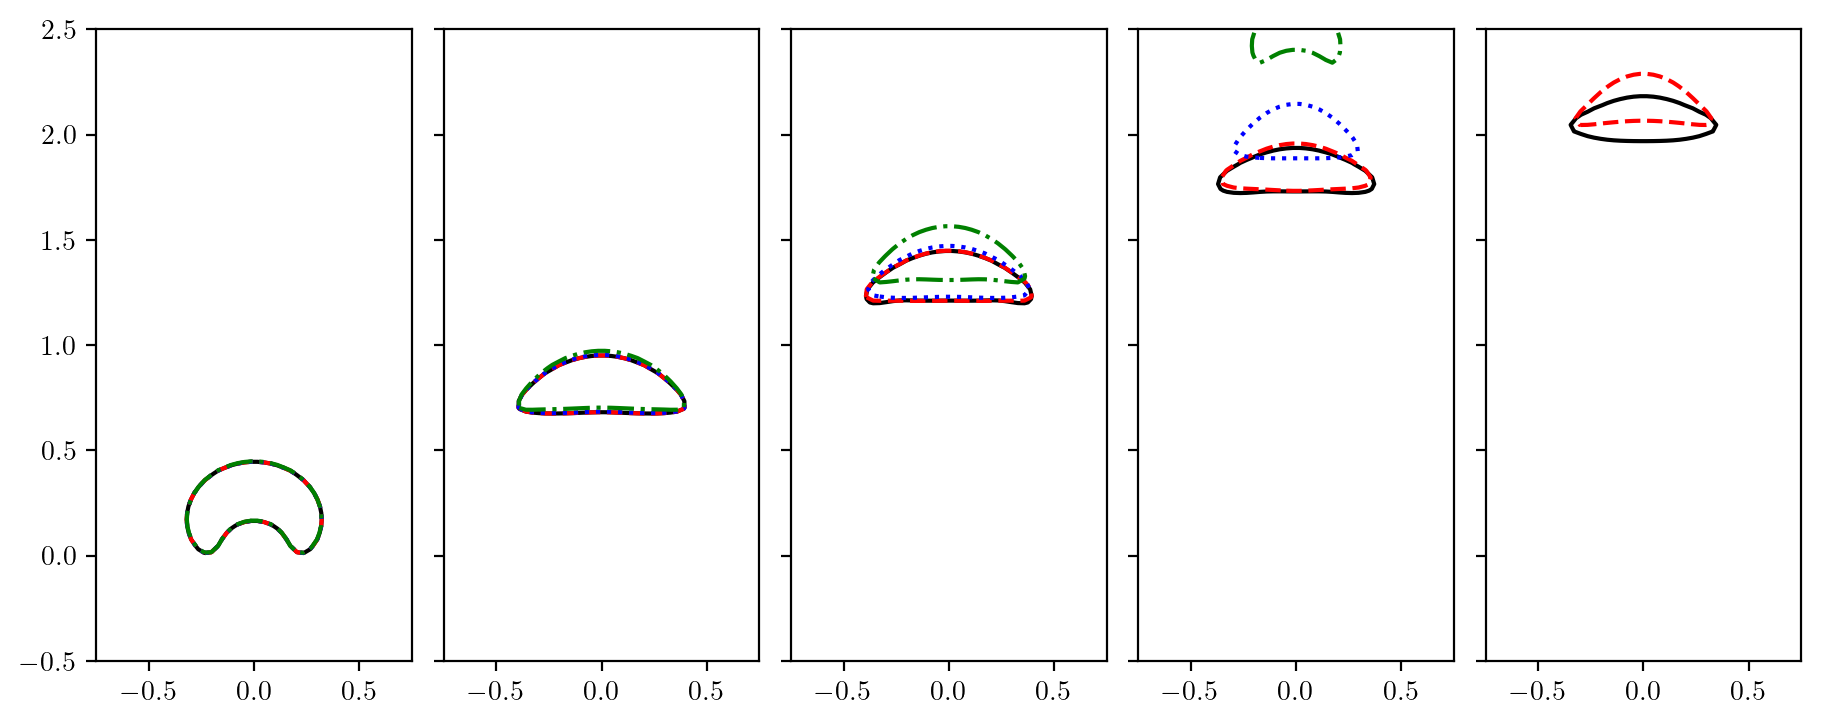

In [9]:
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

figure, subplotList = pyplot.subplots(1,len(fileNumList),sharey="row", figsize=(11,5), dpi=200)

for subplot, datasetDict, fileNum in zip(subplotList, datasetList, fileNumList):
    linestyle = itertools.cycle(("-", "--", ":", "-."))
    colors = itertools.cycle(("black","red","blue","green"))
    for dsetKey in datasetDict.keys():
        for block in datasetDict[dsetKey].blocklist:
            xmesh, ymesh = numpy.meshgrid(block.xrange("center"),block.yrange("center"))
            contour = subplot.contour(xmesh, ymesh, block["dfun"][0,:,:], 
                                      levels=[0], 
                                      linestyles=next(linestyle), colors=next(colors))
            #contour.collections[0].set_label(dsetKey)
    #subplot.set_title(rf"t={fileNum}")
    subplot.set_xlim([-0.75,0.75])
    subplot.set_ylim([-0.5,2.5])
    subplot.set_aspect('equal')
#subplotList[3].legend()
pyplot.subplots_adjust(wspace=0.1, hspace=0)
#pyplot.savefig("rising.png")

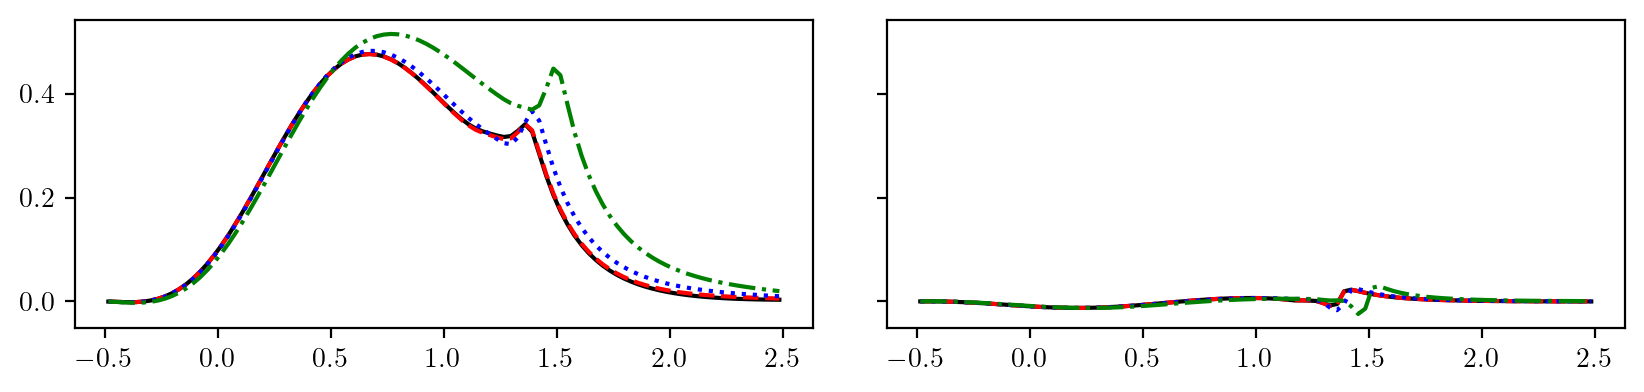

In [6]:
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

figure, subplotList = pyplot.subplots(1,2,sharey="row", figsize=(10,2), dpi=200)

datasetDict = datasetList[2] 
linestyle = itertools.cycle(("-", "--", ":", "-."))
colors = itertools.cycle(("black","red","blue","green"))
for dsetKey in datasetDict.keys():
    for block in datasetDict[dsetKey].blocklist:
        subplotList[0].plot(block.yrange("center"),block["vely"][0,:,int(block.nxb/2)],
                    linestyle=next(linestyle), color=next(colors))

linestyle = itertools.cycle(("-", "--", ":", "-."))
colors = itertools.cycle(("black","red","blue","green"))
for dsetKey in datasetDict.keys():
    for block in datasetDict[dsetKey].blocklist:
        subplotList[1].plot(block.yrange("center"),block["velx"][0,:,int(block.nxb/2)],
                    linestyle=next(linestyle), color=next(colors))
pyplot.subplots_adjust(wspace=0.1, hspace=0)